# **Import section**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,adjusted_rand_score, normalized_mutual_info_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture

# **Laod data**

In [2]:
# Load dataset
ds = pd.read_csv('education_career_successUNSUP.csv')

# Show first 5 rows
ds.head()

,graduate_id,specialty,salary,promotion_rate,job_satisfaction,years_of_experience,remote_work_ratio,certifications,job_title_level,work_environment,industry,projects_handled,avg_hours_per_week,training_hours_per_year,performance_score
0,47201,Corporate Law,35807.85708,0.084806,0.141850,8,0.83,5,Mid,Hybrid,Tech,26,33,20,2.64
1,17099,Software Engineering,82116.63027,0.589723,0.558660,15,0.68,2,Lead,Hybrid,Engineering,20,43,28,3.27
2,32833,Applied Mathematics,119146.80630,0.735802,0.888645,20,0.84,5,Lead,Remote,Design,1,43,70,2.89
3,42330,Cybersecurity,48984.07776,0.428936,0.489204,7,0.71,2,Entry,Hybrid,Gov,0,60,41,2.27
4,15500,Corporate Law,33061.61694,0.180362,0.167610,5,0.69,4,Entry,Hybrid,Tech,6,36,33,3.37


# **EDA(Exploratory Data Analysis)**

---

 analyzing and visualizing the data to understand its structure, patterns, and relationships.

**Analyze**

---

 the data, as this provides the foundation for any visualization,solid understanding of the data



1.   **Data Inspection**




In [3]:
# print number of row and colume of data
print("Shape of the Data:")
print(ds.shape)

# print dataType of each feature
print("The data type of feature :\n")
ds.dtypes

Shape of the Data:
(70061, 15)
The data type of feature :



graduate_id                  int64
specialty                   object
salary                     float64
promotion_rate             float64
job_satisfaction           float64
years_of_experience          int64
remote_work_ratio          float64
certifications               int64
job_title_level             object
work_environment            object
industry                    object
projects_handled             int64
avg_hours_per_week           int64
training_hours_per_year      int64
performance_score          float64
dtype: object




2.   **Statistical Summary**



In [4]:
# Summary statistics of numerical features
print("Data Description:\n")
ds.describe()

Data Description:



,graduate_id,salary,promotion_rate,job_satisfaction,years_of_experience,remote_work_ratio,certifications,projects_handled,avg_hours_per_week,training_hours_per_year,performance_score
count,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000
mean,35000.779392,73777.720842,0.450721,0.550344,9.993534,0.500081,3.506630,15.016057,44.979718,49.820057,3.500801
std,20206.661991,32276.764983,0.261780,0.262048,6.051492,0.288600,2.283204,8.950853,8.940919,29.034729,0.865902
min,1.000000,11458.721010,0.000000,0.033854,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,2.000000
25%,17501.000000,45703.602920,0.229499,0.326127,5.000000,0.250000,2.000000,7.000000,37.000000,25.000000,2.750000
50%,35000.000000,72436.905760,0.451140,0.551436,10.000000,0.500000,4.000000,15.000000,45.000000,50.000000,3.500000
75%,52501.000000,106320.739300,0.681856,0.778323,15.000000,0.750000,5.000000,23.000000,53.000000,75.000000,4.250000
max,70000.000000,199576.301200,0.995514,1.000000,20.000000,1.000000,7.000000,30.000000,60.000000,100.000000,5.000000


In [5]:
summary_statistics = ds.describe(include='all')
summary_statistics

,graduate_id,specialty,salary,promotion_rate,job_satisfaction,years_of_experience,remote_work_ratio,certifications,job_title_level,work_environment,industry,projects_handled,avg_hours_per_week,training_hours_per_year,performance_score
count,70061.000000,70061,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000,70061.000000,70061,70061,70061,70061.000000,70061.000000,70061.000000,70061.000000
unique,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,4,3,4,NaN,NaN,NaN,NaN
top,NaN,Electrical Engineering,NaN,NaN,NaN,NaN,NaN,NaN,Mid,Onsite,Engineering,NaN,NaN,NaN,NaN
freq,NaN,7119,NaN,NaN,NaN,NaN,NaN,NaN,17765,23573,17538,NaN,NaN,NaN,NaN
mean,35000.779392,NaN,73777.720842,0.450721,0.550344,9.993534,0.500081,3.506630,NaN,NaN,NaN,15.016057,44.979718,49.820057,3.500801
std,20206.661991,NaN,32276.764983,0.261780,0.262048,6.051492,0.288600,2.283204,NaN,NaN,NaN,8.950853,8.940919,29.034729,0.865902
min,1.000000,NaN,11458.721010,0.000000,0.033854,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,30.000000,0.000000,2.000000
25%,17501.000000,NaN,45703.602920,0.229499,0.326127,5.000000,0.250000,2.000000,NaN,NaN,NaN,7.000000,37.000000,25.000000,2.750000
50%,35000.000000,NaN,72436.905760,0.451140,0.551436,10.000000,0.500000,4.000000,NaN,NaN,NaN,15.000000,45.000000,50.000000,3.500000
75%,52501.000000,NaN,106320.739300,0.681856,0.778323,15.000000,0.750000,5.000000,NaN,NaN,NaN,23.000000,53.000000,75.000000,4.250000


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70061 entries, 0 to 70060
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   graduate_id              70061 non-null  int64  
 1   specialty                70061 non-null  object 
 2   salary                   70061 non-null  float64
 3   promotion_rate           70061 non-null  float64
 4   job_satisfaction         70061 non-null  float64
 5   years_of_experience      70061 non-null  int64  
 6   remote_work_ratio        70061 non-null  float64
 7   certifications           70061 non-null  int64  
 8   job_title_level          70061 non-null  object 
 9   work_environment         70061 non-null  object 
 10  industry                 70061 non-null  object 
 11  projects_handled         70061 non-null  int64  
 12  avg_hours_per_week       70061 non-null  int64  
 13  training_hours_per_year  70061 non-null  int64  
 14  performance_score     




3.   **Data Cleaning**

---

dataset is confirmed to have no null values, you can skip any steps involving handling missing data



In [7]:
# Checking for missing values
missing_values=ds.isnull().sum()
missing_values

graduate_id                0
specialty                  0
salary                     0
promotion_rate             0
job_satisfaction           0
years_of_experience        0
remote_work_ratio          0
certifications             0
job_title_level            0
work_environment           0
industry                   0
projects_handled           0
avg_hours_per_week         0
training_hours_per_year    0
performance_score          0
dtype: int64

find duplicate rows in your DataFrame and If duplicates are unnecessary, drop them


In [8]:
duplicates = ds[ds.duplicated()]
print(duplicates)

ds = ds.drop_duplicates()

Empty DataFrame
Columns: [graduate_id, specialty, salary, promotion_rate, job_satisfaction, years_of_experience, remote_work_ratio, certifications, job_title_level, work_environment, industry, projects_handled, avg_hours_per_week, training_hours_per_year, performance_score]
Index: []


**Visualizing**

---

 is typically done after analysis to help spot trends, distributions, and relationships more clearly

**Histograms for distribution of individual features.**

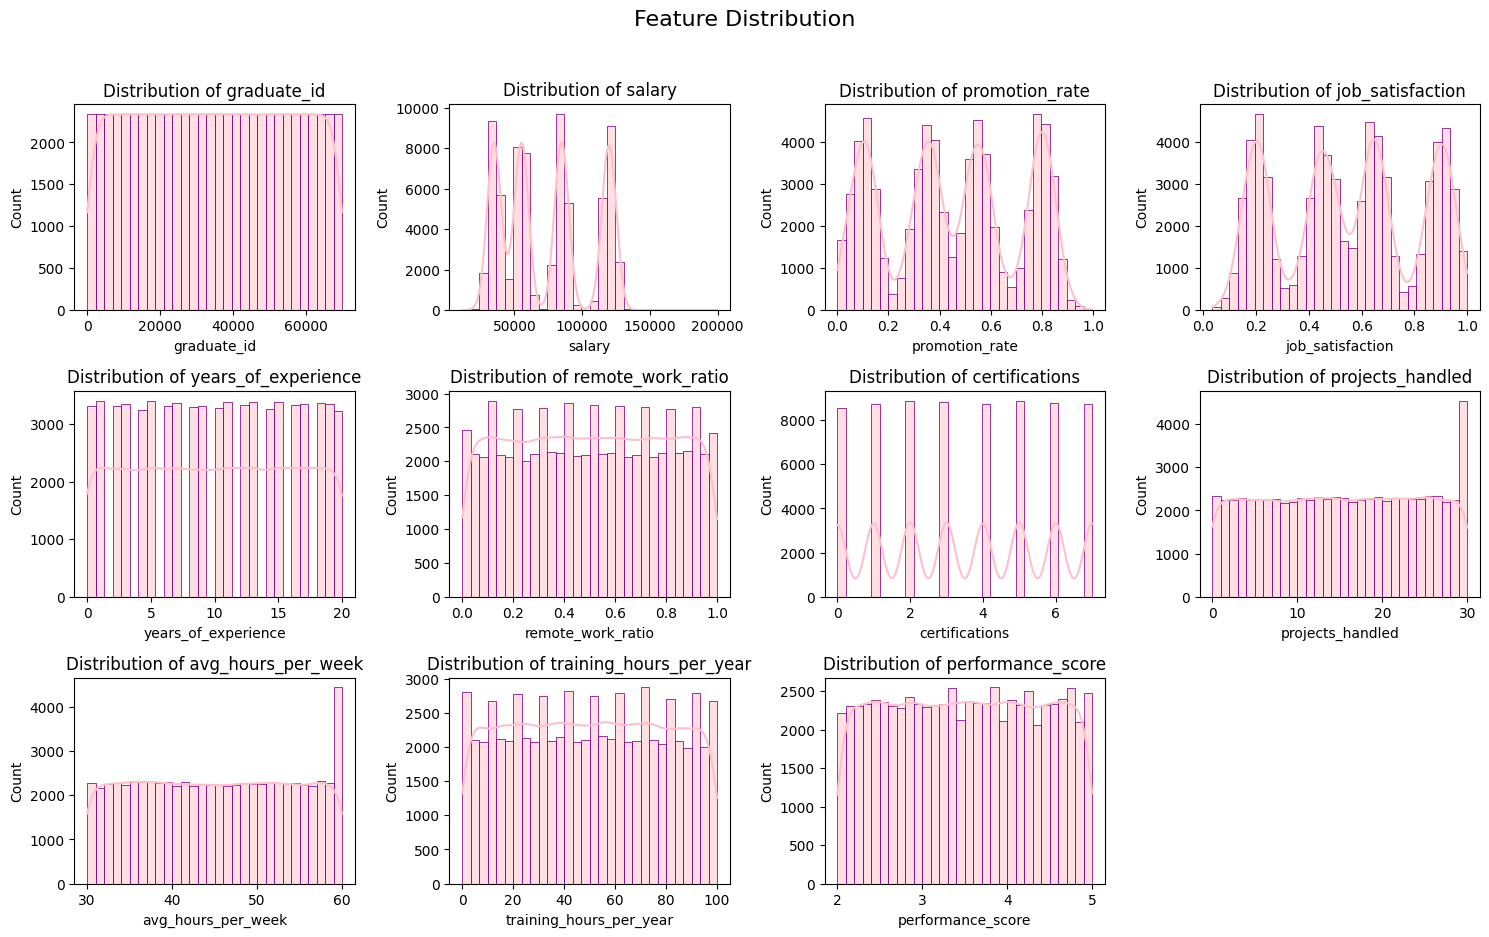

In [9]:
# plot Histogram for each numerical column

# Select only numerical columns
numerical_cols = ds.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
plt.suptitle("Feature Distribution\n\n", fontsize=16)

# Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid size if needed
    sns.histplot(ds[col], bins=30, color='pink', edgecolor='purple',kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Pair plots or scatter plots to explore relationships between two or more variables**

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_13196\70477482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_13196\70477482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_13196\70477482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette='Set2')
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_13196\70477482.py:9: FutureWarn

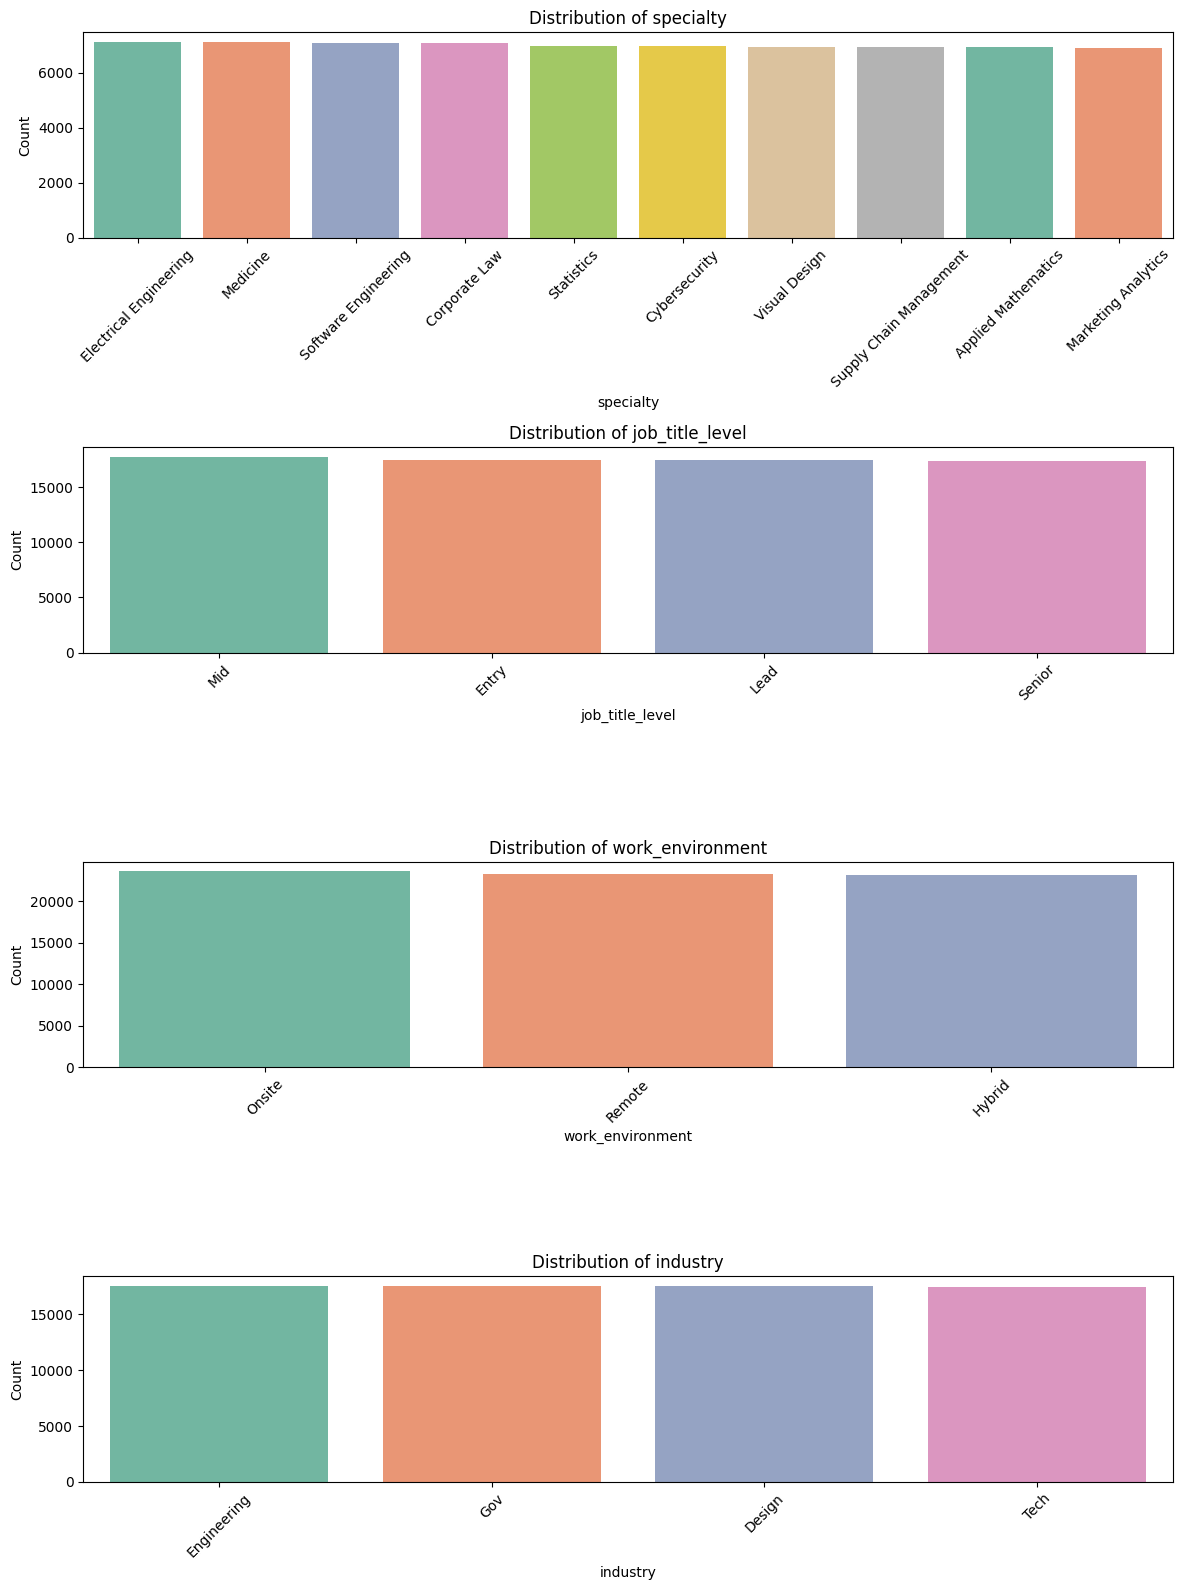

In [11]:
def plot_categories(ds, categorical_cols):

    plt.figure(figsize=(12, 4 * len(categorical_cols)))

    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(len(categorical_cols), 1, i)
        data = ds[col].value_counts()

        sns.barplot(x=data.index, y=data.values, palette='Set2')
        plt.title(f"Distribution of {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

categorical_cols = ["specialty","job_title_level","work_environment",
"industry"]
plot_categories(ds, categorical_cols)

# **Data Preprocessing**

**1** **Feature Engineering**


**Feature Selection**


---

**Note**: We retained only the career outcome features because the primary objective is to classify graduates based on career success, salary levels, promotion prospects, and job satisfaction. These features are the most directly tied to evaluating how effectively graduates transition into the workforce and progress in their careers. By focusing on these dimensions, the model can form meaningful clusters that reflect distinct career trajectories. This clustering can then be used to generate actionable insights or personalized recommendations for future graduates as they prepare to enter the job market.

In [12]:

le = LabelEncoder()
ds['industry_encoded'] = le.fit_transform(ds['industry'])
print("Industry Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

ds['specialty_encoded'] = le.fit_transform(ds['specialty'])
print("specialty Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

print(ds[['industry', 'industry_encoded', 'specialty', 'specialty_encoded']])


Industry Mapping: {'Design': np.int64(0), 'Engineering': np.int64(1), 'Gov': np.int64(2), 'Tech': np.int64(3)}
specialty Mapping: {'Applied Mathematics': np.int64(0), 'Corporate Law': np.int64(1), 'Cybersecurity': np.int64(2), 'Electrical Engineering': np.int64(3), 'Marketing Analytics': np.int64(4), 'Medicine': np.int64(5), 'Software Engineering': np.int64(6), 'Statistics': np.int64(7), 'Supply Chain Management': np.int64(8), 'Visual Design': np.int64(9)}
          industry  industry_encoded                specialty  \
0             Tech                 3            Corporate Law   
1      Engineering                 1     Software Engineering   
2           Design                 0      Applied Mathematics   
3              Gov                 2            Cybersecurity   
4             Tech                 3            Corporate Law   
...            ...               ...                      ...   
70056  Engineering                 1   Electrical Engineering   
70057          Gov 

In [13]:
# Clean column names (remove leading/trailing spaces)
ds.columns = ds.columns.str.strip()

# Select only relevant features
selected_features = [
    'salary',
    'job_satisfaction',
    'promotion_rate','industry_encoded','specialty_encoded']

# Subset the dataset with the selected features
ds_selected = ds[selected_features]

In [14]:
ds_selected.head()

,salary,job_satisfaction,promotion_rate,industry_encoded,specialty_encoded
0,35807.85708,0.141850,0.084806,3,1
1,82116.63027,0.558660,0.589723,1,6
2,119146.80630,0.888645,0.735802,0,0
3,48984.07776,0.489204,0.428936,2,2
4,33061.61694,0.167610,0.180362,3,1


**2** **Feature Scaling**

---
Standardize or normalize features, especially if
you're using models sensitive to feature scaling

In [15]:
# Standardize the transformed dataset
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds_selected)

**3.  Visualizing Clusters with PCA (2D Plot)**

---


Since clustering happens in high-dimensional space, you can use PCA to reduce it to 2D for visualization:

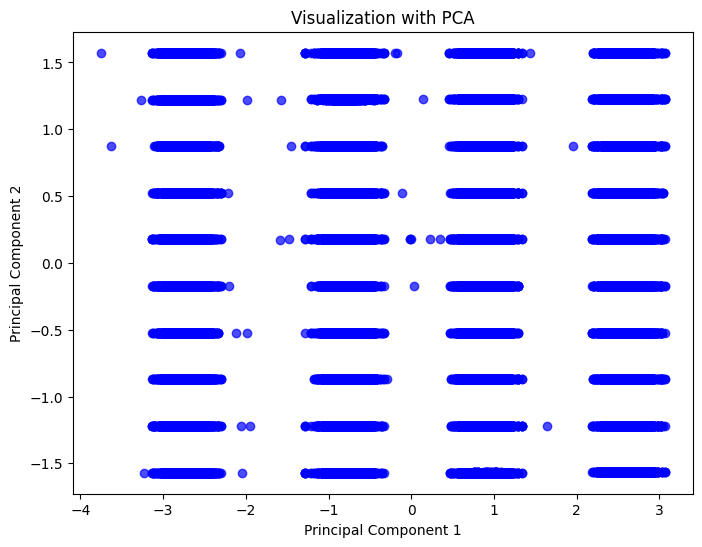

In [17]:
pca = PCA(n_components=4)
reduced_data = pca.fit_transform(ds_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, c='blue')  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization with PCA')
plt.show()

# **Choosing a Unsupervised Algorithm**


Internal Evaluation Metrics (Unsupervised):

              Silhouette Score  Calinski-Harabasz  Davies-Bouldin
K-Means               0.455450       87109.629204        0.920846
GMM                   0.454600       86627.929133        0.924280
Hierarchical          0.400887        2209.382341        0.964953
DBSCAN                0.432442       63130.225301        2.390465

External Evaluation Metrics :

                   ARI       NMI
K-Means       0.083354  0.187995
GMM           0.083044  0.185441
Hierarchical  0.045861  0.118860
DBSCAN       -0.000001  0.000149


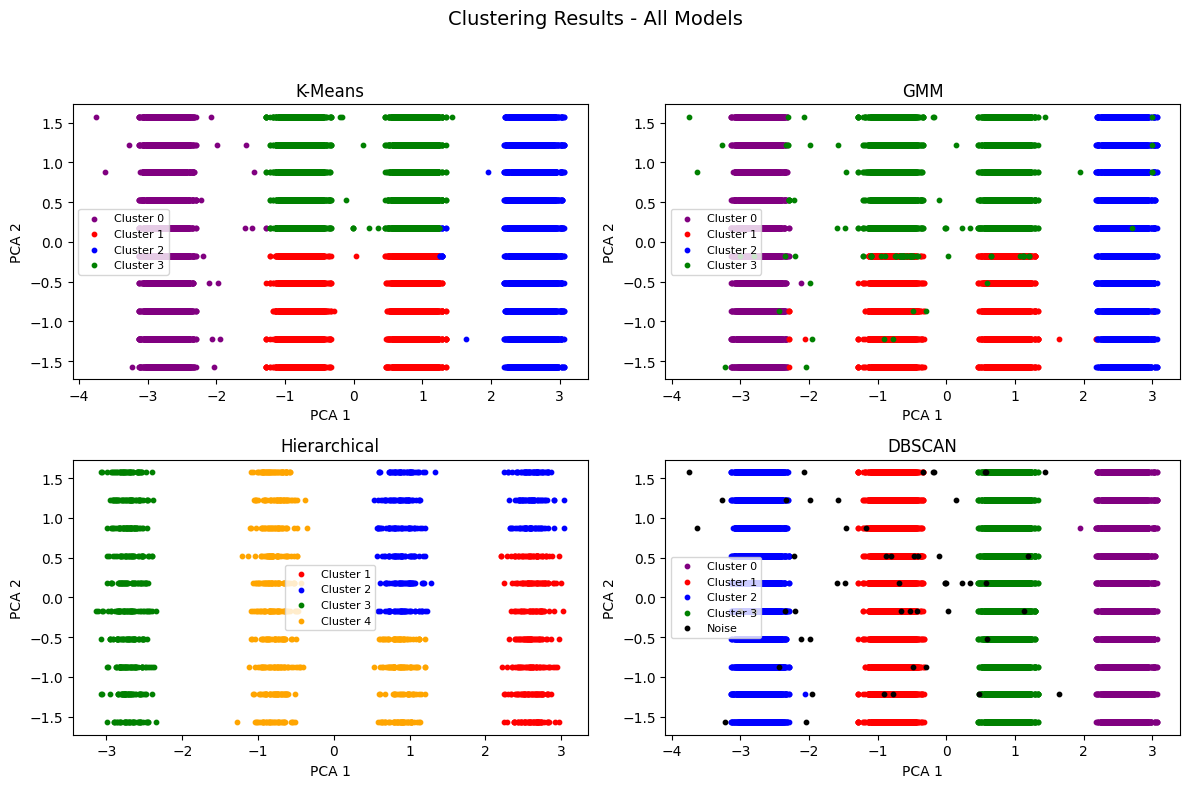

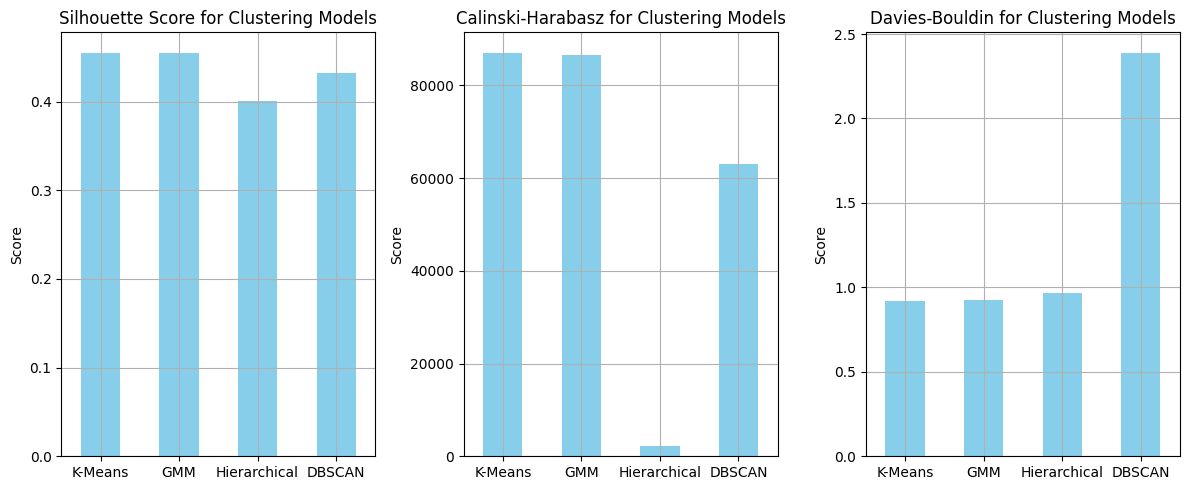

In [18]:

# --- Perform PCA for 2D visualization ---
pca = PCA(n_components=2)
ds_pca = pca.fit_transform(reduced_data)

# --- Fit models ---
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(reduced_data)

hc_linkage = linkage(reduced_data[:2000], method='ward')
hc_labels = fcluster(hc_linkage, t=4, criterion='maxclust')

dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(reduced_data)

# --- Store models' labels ---
models = {
    "K-Means": kmeans_labels,
    "GMM": gmm_labels,
    "Hierarchical": hc_labels,
    "DBSCAN": dbscan_labels
}

# --- Store PCA-transformed data for plotting ---
models_plot_data = {
    "K-Means": ds_pca,
    "GMM": ds_pca,
    "Hierarchical": pca.transform(reduced_data[:2000]),
    "DBSCAN": ds_pca
}

# --- Encode ground truth labels for external evaluation ---
true_labels = LabelEncoder().fit_transform(ds["specialty_encoded"])

# --- Calculate internal and external metrics ---
internal_metrics = {}
external_metrics = {}

for name, labels in models.items():
    data_used = reduced_data[:2000] if name == "Hierarchical" else reduced_data
    used_labels = labels if name != "Hierarchical" else labels[:2000]
    used_true = true_labels if name != "Hierarchical" else true_labels[:2000]

    if len(set(used_labels)) > 1:
        internal_metrics[name] = {
            "Silhouette Score": silhouette_score(data_used, used_labels),
            "Calinski-Harabasz": calinski_harabasz_score(data_used, used_labels),
            "Davies-Bouldin": davies_bouldin_score(data_used, used_labels),
        }
        external_metrics[name] = {
            "ARI": adjusted_rand_score(used_true, used_labels),
            "NMI": normalized_mutual_info_score(used_true, used_labels)
        }
    else:
        internal_metrics[name] = {
            "Silhouette Score": None,
            "Calinski-Harabasz": None,
            "Davies-Bouldin": None
        }
        external_metrics[name] = {
            "ARI": None,
            "NMI": None
        }

# --- Convert to DataFrames ---
internal_df = pd.DataFrame(internal_metrics).T
external_df = pd.DataFrame(external_metrics).T

# --- Print evaluation tables ---
print("\nInternal Evaluation Metrics (Unsupervised):\n")
print(internal_df)

print("\nExternal Evaluation Metrics :\n")
print(external_df)

# --- Plotting the clusters ---
colors = ['purple', 'red', 'blue', 'green', 'orange', 'cyan', 'brown', 'pink', 'gray']
plt.figure(figsize=(12, 8))
for i, (name, labels) in enumerate(models.items(), 1):
    data = models_plot_data[name]
    
    plt.subplot(2, 2, i)
    unique_labels = set(labels)
    for label in unique_labels:
        color = 'black' if label == -1 else colors[label % len(colors)]
        label_name = 'Noise' if label == -1 else f'Cluster {label}'
        plt.scatter(data[labels == label, 0], data[labels == label, 1], s=10, color=color, label=label_name)
    
    plt.title(name, fontsize=12)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(fontsize=8)

plt.suptitle("Clustering Results - All Models", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Optional: Internal metric plots for each metric separately ---
fig, axes = plt.subplots(1, 3, figsize=(12, 5))  # Create 1 row with 3 subplots
metrics = ['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin']  # List of internal metrics

# Plot each metric for each model in separate plots
axes = axes.flatten()  # Flatten the axes array to easily iterate over
for i, metric in enumerate(metrics):
    internal_df[metric].plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f"{metric} for Clustering Models")
    axes[i].set_ylabel("Score")
    axes[i].set_xticklabels(internal_df.index, rotation=0)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [19]:
# --- Combine internal and external metrics ---
full_df = pd.concat([internal_df, external_df], axis=1)

# --- Apply Ranking: higher is better for all except Davies-Bouldin (lower is better) ---
rank_df = full_df.copy()

rank_df['Silhouette Rank'] = rank_df['Silhouette Score'].rank(ascending=False)
rank_df['Calinski Rank'] = rank_df['Calinski-Harabasz'].rank(ascending=False)
rank_df['Davies Rank'] = rank_df['Davies-Bouldin'].rank(ascending=True)
rank_df['ARI Rank'] = rank_df['ARI'].rank(ascending=False)
rank_df['NMI Rank'] = rank_df['NMI'].rank(ascending=False)

# --- Compute average rank and final rank ---
rank_df['Average Rank'] = rank_df[[
    'Silhouette Rank', 'Calinski Rank', 'Davies Rank', 'ARI Rank', 'NMI Rank'
]].mean(axis=1)

rank_df['Final Rank'] = rank_df['Average Rank'].rank(ascending=True)

# --- Show final sorted ranking ---
print("\n Final Model Ranking Based on Internal & External Metrics:\n")
print(rank_df[[
    'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin',
    'ARI', 'NMI', 'Final Rank'
]].sort_values(by='Final Rank'))



 Final Model Ranking Based on Internal & External Metrics:

              Silhouette Score  Calinski-Harabasz  Davies-Bouldin       ARI  \
K-Means               0.455450       87109.629204        0.920846  0.083354   
GMM                   0.454600       86627.929133        0.924280  0.083044   
Hierarchical          0.400887        2209.382341        0.964953  0.045861   
DBSCAN                0.432442       63130.225301        2.390465 -0.000001   

                   NMI  Final Rank  
K-Means       0.187995         1.0  
GMM           0.185441         2.0  
Hierarchical  0.118860         3.0  
DBSCAN        0.000149         4.0  


# **Unsupervised Algorithm**

K-mean, we’ll proceed with that.
Since we have decided to use K-Means, so the next step is to choose the best number of clusters (K).

* Elbow Method (to detect the "knee" or elbow point)
* Silhouette Score (to measure clustering quality)

 

In [20]:
# Initialize empty lists to store evaluation metrics
wss = []             # To store Within-Cluster Sum of Squares (Inertia)
silhouette = []      # To store Silhouette Scores

# Define the range of cluster numbers (K) to evaluate
K_range = range(6, 10)  # You can change this based on your needs
# Loop through each value of K
for k in K_range:
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data)  # reduced_data is the normalized dataset

    # Append WSS (inertia) for the current K
    wss.append(kmeans.inertia_)

    # Append Silhouette Score for the current K
    silhouette.append(silhouette_score(reduced_data, labels))




**1.**   **To detect Elbow point**

---
 find the optimal number of clusters (K) by looking at how much the inertia (Within-Cluster Sum of Squares — WSS) decreases as you increase K.


**A** 

* The curve usually drops quickly at first, then slows down — forming an “elbow”.

* The elbow point is the K where adding more clusters doesn’t significantly reduce WSS.


Text(0.5, 1.0, 'Elbow Method')

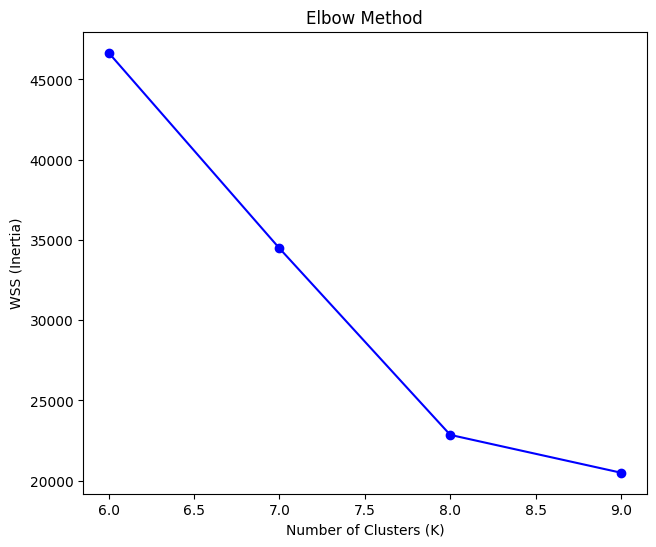

In [21]:

plt.figure(figsize=(16, 6)) 
# Plot WSS vs. K (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(K_range, wss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSS (Inertia)')
plt.title('Elbow Method')




**2.**   **To measure clustering quality**

---
 A metric that tells you how well each point fits in its cluster — it measures how similar a point is to its own cluster compared to other clusters.


**B** 

* +1: Well matched to its own cluster, and far from others.

* 0: On or very close to the boundary between clusters.

* -1: Assigned to the wrong cluster.


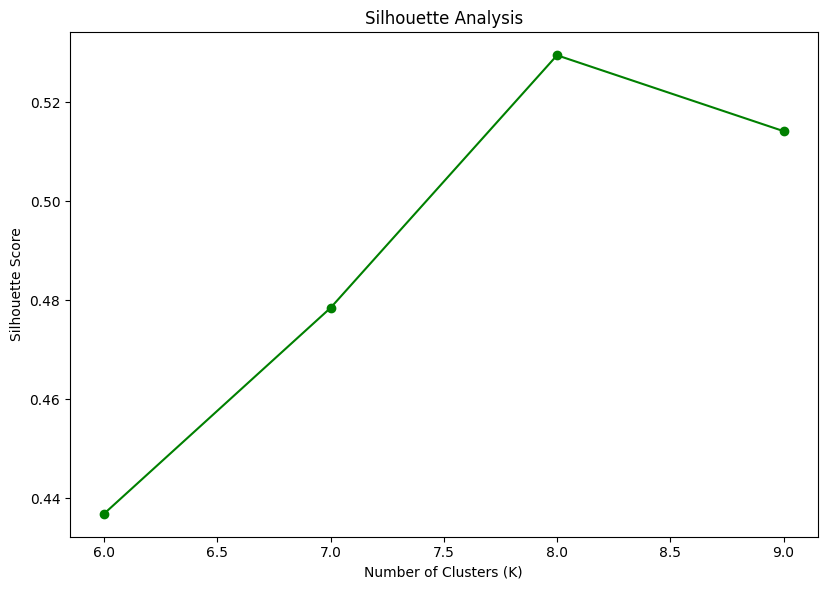

In [22]:
plt.figure(figsize=(16, 6)) 
# Plot Silhouette Score vs. K
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, 'go-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**NOTE**
 1. Elbow Method (WSS/Inertia Curve)
The "elbow" in the curve appears around **K = 7**.

This indicates that adding more clusters beyond 7 does not significantly reduce the Within-Cluster Sum of Squares (WSS), meaning the gain in compactness becomes marginal.

Conclusion from Elbow Method: K = 7 is a good candidate.

2. Silhouette Score Analysis
The Silhouette Score peaks at **K = 8**, meaning clusters are best separated and most cohesive at this value.

However, the score for K = 7 is still relatively high, and higher than at K = 6 or K = 9.

**Conclusion from Silhouette Score: K = 8 gives the most distinct clusters.**

**2**.**Train the K-mean Model**

---

Once you determine the optimal K from Elbow plot 

In [23]:
# Initialize KMeans with your chosen number of clusters (8)
kmeans = KMeans(n_clusters=8, random_state=42)

# Fit KMeans to the scaled data
clusters = kmeans.fit_predict(reduced_data)

# Assign cluster labels to the original dataset
ds_selected['Cluster'] = clusters

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18920\3953231012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_selected['Cluster'] = clusters


**3**. **Analyze and Interpret Clusters**

---
After applying K-Means clustering, analyze the resulting clusters to understand their structure and evaluate their meaningfulness:

1. Examine the number of data points in each cluster to identify class imbalances or dominant groupings.

2. Use PCA or t-SNE to reduce dimensionality for visualization and inspect how well-separated the clusters are in 2D space.

3. Analyze the centroids of each cluster to understand the average profile of each group based on key features (e.g., salary, job satisfaction, industry, and recommended major).

4. Support your analysis with visualizations such as scatter plots and bar charts to compare feature distributions across clusters.

5. Interpret the practical significance of each cluster. For example, determine if a specific cluster represents high-salary, high-satisfaction jobs or a specific industry segment.



**(A)Count the number of distinct clusters and nois data**
    


In [24]:
# Number of data points in each cluster
cluster_counts = ds_selected['Cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)


Cluster counts:
 Cluster
3    8913
0    8829
1    8818
2    8754
6    8731
7    8699
4    8685
5    8632
Name: count, dtype: int64


**(B) Apply t-SNE plot the clusters in a two-dimensional space for visualization.**

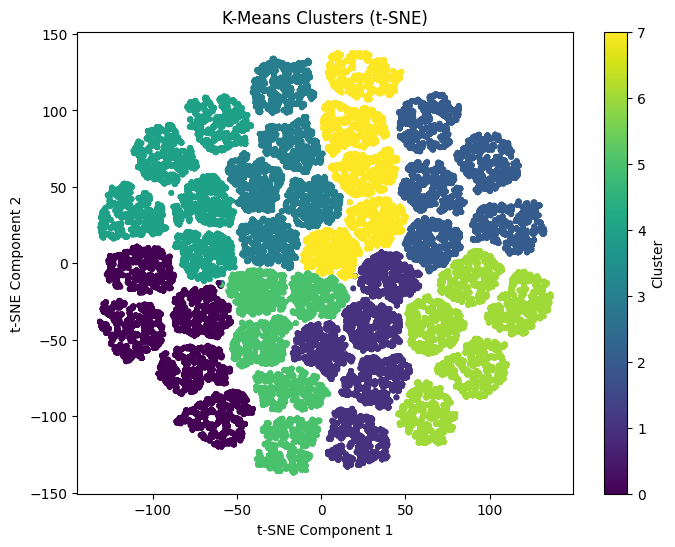

In [25]:
tsne = TSNE(n_components=2, random_state=42)
ds_tsne = tsne.fit_transform(ds_scaled)

# Visualize clusters in 2D
plt.figure(figsize=(8,6))
plt.scatter(ds_tsne[:, 0], ds_tsne[:, 1], c=ds_selected['Cluster'], cmap='viridis', s=10)
plt.title("K-Means Clusters (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster')
plt.show()

**(C). Centroids of Each Cluster**





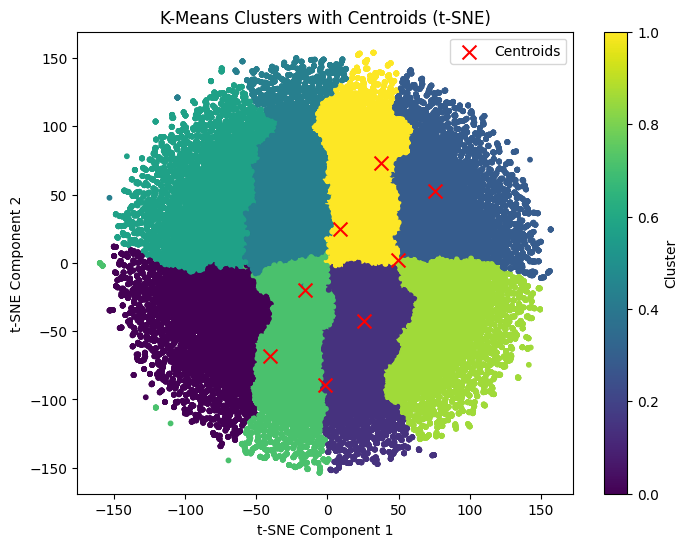

In [26]:

# Define t-SNE with modified perplexity
tsne = TSNE(perplexity=5, random_state=42)  # Reduce perplexity to fit the sample size

# Fit t-SNE on the full dataset
ds_tsne = tsne.fit_transform(ds_scaled)

# Get the centroids of each cluster
centroids = kmeans.cluster_centers_

# Reduce centroids to 2D using t-SNE for visualization
centroids_tsne = tsne.fit_transform(centroids)

# Visualize centroids on the t-SNE plot
plt.figure(figsize=(8,6))
plt.scatter(ds_tsne[:, 0], ds_tsne[:, 1], c=ds_selected['Cluster'], cmap='viridis', s=10)
plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title("K-Means Clusters with Centroids (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


**(D) Cluster Summary with Feature Distribution**

In [27]:
# Display summary statistics for each cluster
cluster_summary = ds_selected.groupby('Cluster').agg({
    'salary': ['mean', 'std'],
    'job_satisfaction': ['mean', 'std'],
    'promotion_rate': ['mean', 'std'],
    'industry_encoded': ['mean', 'std'],
    'specialty_encoded': ['mean', 'std']
})

print("\nCluster Summary:\n", cluster_summary)



Cluster Summary:
                 salary              job_satisfaction           promotion_rate  \
                  mean          std             mean       std           mean   
Cluster                                                                         
0        119942.497028  4542.742502         0.900035  0.049903       0.798985   
1         55117.108460  4013.674332         0.451385  0.050983       0.350696   
2         35080.344773  4098.618769         0.199534  0.049102       0.100940   
3         84960.856425  4622.637157         0.648664  0.050120       0.551607   
4        119900.953111  4321.610779         0.900585  0.049314       0.799826   
5         84799.508623  4299.325252         0.649111  0.048753       0.551312   
6         35077.293247  4032.917680         0.199480  0.048709       0.100392   
7         55179.617920  4035.779026         0.452500  0.051468       0.350526   

                  industry_encoded           specialty_encoded            
              

**(E) Cluster Comparison (Feature Distribution)**

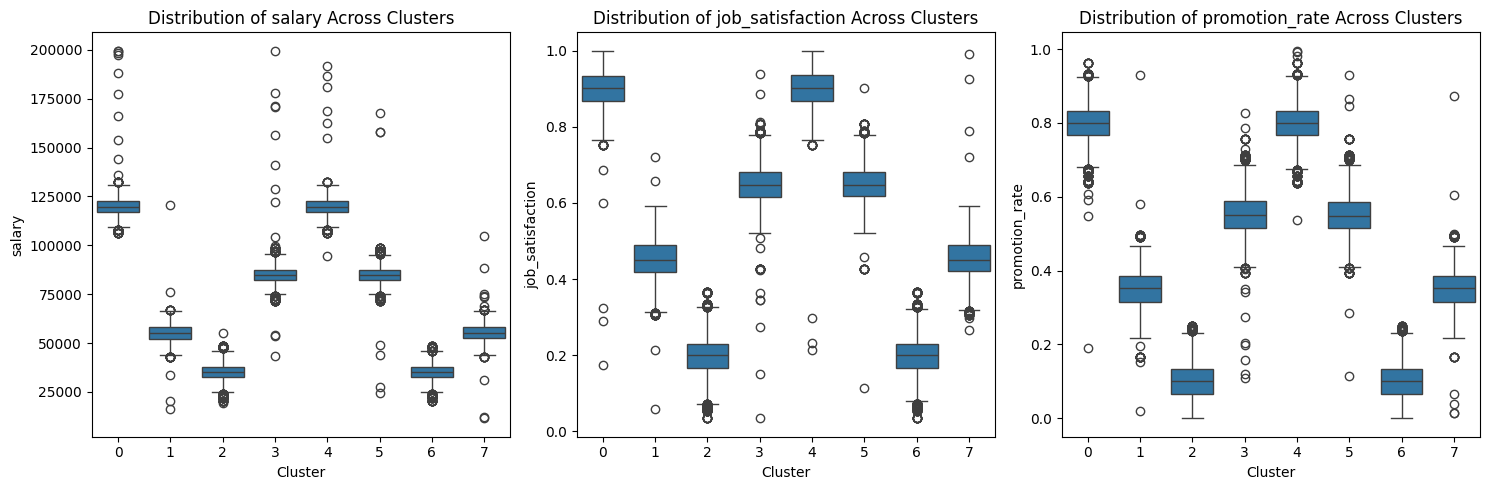

In [28]:
# Define features to plot
features = ['salary', 'job_satisfaction', 'promotion_rate']

# Set up the figure with a smaller size for subplots
plt.figure(figsize=(15, 5))

# Plot each feature in a separate subplot
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, and plot the i-th subplot
    sns.boxplot(x='Cluster', y=feature, data=ds_selected)
    plt.title(f"Distribution of {feature} Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

**(F)  Visualizing Cluster Differences (with t-SNE)**

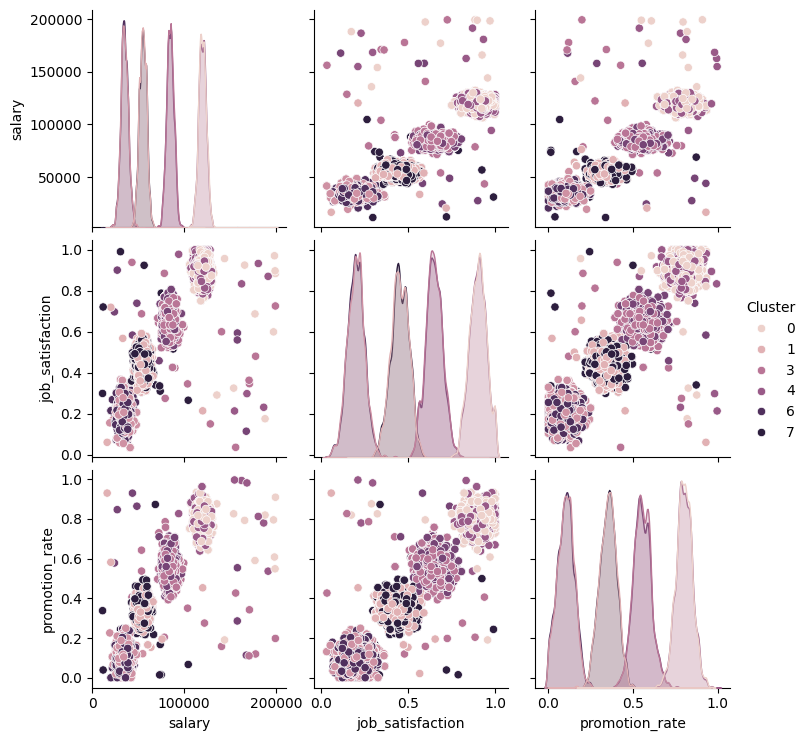

In [29]:
# Visualizing how clusters differ in key features using pairplots (optional for larger datasets)
sns.pairplot(ds_selected[['salary', 'job_satisfaction', 'promotion_rate', 'Cluster']], hue='Cluster')
plt.show()


**4. Model Evaluation & Fine-Tuning**

---
by :



*   Silhouette Score
*   Davies-Bouldin Index








In [30]:
# Silhouette score based on PCA-reduced data
sil_score_pca = silhouette_score(reduced_data, clusters)
print(f"Silhouette Score : {sil_score_pca}")


Silhouette Score : 0.529536709163302


In [31]:
db_score = davies_bouldin_score(reduced_data, ds_selected['Cluster'])
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.6228376471147149


In [ ]:
industry_le = LabelEncoder()
industry_le.classes_ = np.array(['Design', 'Engineering', 'Gov', 'Tech'])

major_le = LabelEncoder()
major_le.classes_ = np.array([
    'Applied Mathematics', 'Corporate Law', 'Cybersecurity',
    'Electrical Engineering', 'Marketing Analytics', 'Medicine',
    'Software Engineering', 'Statistics', 'Supply Chain Management',
    'Visual Design'
])

cluster_summary = ds_selected.groupby('Cluster').agg({
    'salary': 'mean',
    'job_satisfaction': 'mean',
    'promotion_rate': 'mean',
    'industry_encoded': lambda x: x.mode()[0]
}).reset_index()

cluster_summary['industry_decoded'] = industry_le.inverse_transform(cluster_summary['industry_encoded'].astype(int))


top_majors_per_cluster = (
    ds_selected.groupby('Cluster')['specialty_encoded']
    .apply(lambda x: x.value_counts().head(3).index.tolist())  # Top 3 instead of 2
    .reset_index(name='top_specialties_encoded')
)

cluster_summary = cluster_summary.merge(top_majors_per_cluster, on='Cluster')

cluster_summary['top_specialties_decoded'] = cluster_summary['top_specialties_encoded'].apply(
    lambda codes: [major_le.inverse_transform([code])[0] for code in codes]
)

for idx, row in cluster_summary.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print(f"  Average Salary: {row['salary']:.2f}")
    print(f"  Job Satisfaction: {row['job_satisfaction']:.2f}")
    print(f"  Promotion Rate: {row['promotion_rate']:.2f}")
    print(f"  Industry: {row['industry_decoded']}")
    print(f"  Top 3 Specialties: {', '.join(row['top_specialties_decoded'])}")
    print("-" * 50)


Cluster 0:
  Average Salary: 119942.50
  Job Satisfaction: 0.90
  Promotion Rate: 0.80
  Industry: Design
  Top 3 Specialties: Electrical Engineering, Corporate Law, Marketing Analytics
--------------------------------------------------
Cluster 1:
  Average Salary: 55117.11
  Job Satisfaction: 0.45
  Promotion Rate: 0.35
  Industry: Gov
  Top 3 Specialties: Corporate Law, Electrical Engineering, Marketing Analytics
--------------------------------------------------
Cluster 2:
  Average Salary: 35080.34
  Job Satisfaction: 0.20
  Promotion Rate: 0.10
  Industry: Tech
  Top 3 Specialties: Software Engineering, Statistics, Visual Design
--------------------------------------------------
Cluster 3:
  Average Salary: 84960.86
  Job Satisfaction: 0.65
  Promotion Rate: 0.55
  Industry: Engineering
  Top 3 Specialties: Medicine, Visual Design, Statistics
--------------------------------------------------
Cluster 4:
  Average Salary: 119900.95
  Job Satisfaction: 0.90
  Promotion Rate: 0.80
  

# **Deploying the Model**

In [34]:
import joblib
joblib.dump(kmeans, 'unsupervised_model.pkl')

['unsupervised_model.pkl']